# \Sigma_{a1} в зависимости от плотности теплоносителя, температуры теплоносителя, температуры топлива и концентрации борной кислоты

In [1]:
import pandas as pd

Загрузка данных

In [2]:
df = pd.read_excel('Input/Data.xlsx')
df.head(3)

,\rho(g/cm^3),T_c(K),T_f(K),c_b(ppm),3S_{tr1}(1),3S_{tr2}(2),\Sigma_{a1}(3),\Sigma_{a2}(4),nuS_{f1}(5),nuS_{f2}(6),\Sigma_{f1}(7),\Sigma_{f2}(8),\Sigma_{1->2}(9),k_{inf}(10),\sigma_{a2}^{Xe},\sigma_{a2}^{Sm}
0,0.7235,575.0,1027.0,600.0,0.661853,2.568298,0.009376,0.085584,0.006677,0.133250,0.002620,0.054750,0.017392,1.261041,1072970.0,35421.398
1,0.7750,448.0,1043.0,1500.0,0.679602,2.874687,0.009581,0.098339,0.006723,0.139256,0.002636,0.057218,0.018726,1.174265,1141000.0,36147.801
2,0.9125,370.5,1418.0,750.0,0.727336,3.668742,0.009908,0.102815,0.006844,0.153823,0.002681,0.063203,0.022463,1.249619,1308480.0,39214.000


In [3]:
names = ['\\rho(g/cm^3)',
 'T_c(K)',
 'T_f(K)',
 'c_b(ppm)',
 '\\Sigma_{a1}(3)']

In [4]:
train_dataset = df[names].sample(frac=0.8,random_state=0)
test_dataset = df[names].drop(train_dataset.index)

In [5]:
train_dataset.head(3)

,\rho(g/cm^3),T_c(K),T_f(K),c_b(ppm),\Sigma_{a1}(3)
158,0.798633,405.61719,486.35941,855.46881,0.009191
83,0.701953,561.82812,1664.09400,1195.31200,0.009682
170,1.047852,294.21091,1447.29700,1746.09400,0.010267


In [6]:
test_dataset.head(3)

,\rho(g/cm^3),T_c(K),T_f(K),c_b(ppm),\Sigma_{a1}(3)
9,0.878125,544.8750,1511.750,562.50,0.009870
21,1.032812,477.0625,1746.125,2343.75,0.010476
25,0.860937,496.4375,339.875,1031.25,0.009183


<AxesSubplot:>

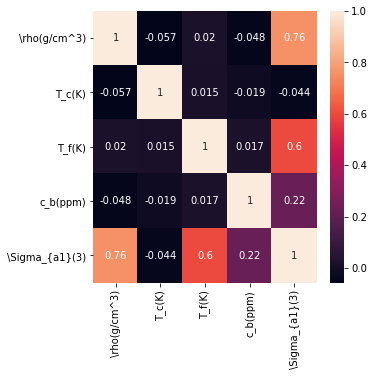

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(5,5)) # Sample figsize in inches
sns.heatmap(train_dataset[names].corr(), annot = True, fmt='.2g')

## Линейная регрессия

In [8]:
import statsmodels.api as sm
import statsmodels as statsmodels

train_data = train_dataset[names[:-1]]
train_data = sm.add_constant(train_data)

test_data = test_dataset[names[:-1]]
test_data = sm.add_constant(test_data)

display(train_data.head(3))
display(test_data.head(3))

,const,\rho(g/cm^3),T_c(K),T_f(K),c_b(ppm)
158,1.0,0.798633,405.61719,486.35941,855.46881
83,1.0,0.701953,561.82812,1664.09400,1195.31200
170,1.0,1.047852,294.21091,1447.29700,1746.09400


,const,\rho(g/cm^3),T_c(K),T_f(K),c_b(ppm)
9,1.0,0.878125,544.8750,1511.750,562.50
21,1.0,1.032812,477.0625,1746.125,2343.75
25,1.0,0.860937,496.4375,339.875,1031.25


In [9]:
train_labels = train_dataset['\\Sigma_{a1}(3)']
display(train_labels.head(3))

test_labels = test_dataset['\\Sigma_{a1}(3)']
display(test_labels.head(3))

158    0.009191
83     0.009682
170    0.010267
Name: \Sigma_{a1}(3), dtype: float64

9     0.009870
21    0.010476
25    0.009183
Name: \Sigma_{a1}(3), dtype: float64

In [10]:
model = sm.OLS(train_labels, train_data)

fit = model.fit()
g = fit.summary()
g

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         \Sigma_{a1}(3)   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     2684.
Date:                Sat, 06 Feb 2021   Prob (F-statistic):          3.57e-173
Time:                        20:36:53   Log-Likelihood:                 1729.5
No. Observations:                 206   AIC:                            -3449.
Df Residuals:                     201   BIC:                            -3432.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0073   3.03e-05    240.115      0.000       0.007       0.007
\rho(g/cm^3)     0.0019   2.45e-05     79.231      0.000       0.002       0.002
T_c(K)       -1.713e-08   4.27e-08     -0.401      0.689   -1.01e-07     6.7e-08
T_f(K)        5.525e-07   9.11e-09     60.648      0.000    5.35e-07     5.7e-07
c_b(ppm)      1.164e-07   4.46e-09     26.112      0.000    1.08e-07    1.25e-07
==============================================================================
Omnibus:                       35.901   Durbin-Watson:                   2.254
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               50.291
Skew:                          -1.047   Prob(JB):                     1.20e-11
Kurtosis:                       4.213   Cond. No.                     1.85e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.85e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [11]:
g = fit.pvalues
g

const           4.032260e-249
\rho(g/cm^3)    1.492454e-153
T_c(K)           6.886047e-01
T_f(K)          3.662547e-131
c_b(ppm)         1.640938e-66
dtype: float64

T_c(K) - не значим на 10-ом % урвоне значимости

In [12]:
features = ['\\rho(g/cm^3)', 'T_f(K)', 'c_b(ppm)']

In [13]:
train_data = train_dataset[features]
train_data = sm.add_constant(train_data)

train_data.head(3)

,const,\rho(g/cm^3),T_f(K),c_b(ppm)
158,1.0,0.798633,486.35941,855.46881
83,1.0,0.701953,1664.09400,1195.31200
170,1.0,1.047852,1447.29700,1746.09400


In [14]:
model = sm.OLS(train_labels, train_data)

fit = model.fit()
g = fit.summary()
g

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         \Sigma_{a1}(3)   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     3594.
Date:                Sat, 06 Feb 2021   Prob (F-statistic):          5.94e-175
Time:                        20:36:53   Log-Likelihood:                 1729.4
No. Observations:                 206   AIC:                            -3451.
Df Residuals:                     202   BIC:                            -3438.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0073   2.26e-05    321.523      0.000       0.007       0.007
\rho(g/cm^3)     0.0019   2.44e-05     79.557      0.000       0.002       0.002
T_f(K)        5.524e-07   9.09e-09     60.776      0.000    5.35e-07     5.7e-07
c_b(ppm)      1.165e-07   4.45e-09     26.182      0.000    1.08e-07    1.25e-07
==============================================================================
Omnibus:                       36.341   Durbin-Watson:                   2.255
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               51.170
Skew:                          -1.056   Prob(JB):                     7.74e-12
Kurtosis:                       4.227   Cond. No.                     1.62e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.62e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
p = fit.pvalues
p

const           1.114568e-275
\rho(g/cm^3)    1.909580e-154
T_f(K)          8.934611e-132
c_b(ppm)         7.582079e-67
dtype: float64

Все регрессоры значимы на 1-ом уровне значимости %.

In [16]:
ypred = fit.predict(train_data)
ypred

158    0.009180
83     0.009682
170    0.010299
101    0.010378
150    0.009880
         ...   
151    0.009585
202    0.009838
31     0.008840
209    0.010077
127    0.008969
Length: 206, dtype: float64

In [17]:
train_labels

158    0.009191
83     0.009682
170    0.010267
101    0.010408
150    0.009951
         ...   
151    0.009539
202    0.009804
31     0.008841
209    0.010099
127    0.008912
Name: \Sigma_{a1}(3), Length: 206, dtype: float64

\begin{align*}
\text{MSE} = \frac{1}{N} \text{RSS} = \frac{1}{N} \sum (f_i -y_i)^2
\end{align*}

In [18]:
MSE = statsmodels.tools.eval_measures.mse(train_labels, ypred)
MSE

2.98882828566469e-09

\begin{align*}
\sigma = \sqrt{MSE}
\end{align*}

Среднеквадратическое отклонение в абсолютных единицах для тренировочной выборки

In [19]:
import math as math
sigma = math.sqrt(MSE)
sigma

5.467017729681046e-05

In [20]:
train_labels.mean()

0.009519196648058253

Среднеквадратическое отклонение в процентах для среднего значения для тренировочной выборки

In [21]:
sigma = sigma/train_labels.mean()

In [22]:
print("Среднеквадратическое отклонение: ", round(sigma*100, 3) , '%')

Среднеквадратическое отклонение:  0.574 %


Среднеквадратическое отклонение в процентах для среднего значения для тестовой выборки

In [23]:
test_data = test_dataset[features]
test_data = sm.add_constant(test_data)
ypred = fit.predict(test_data)

MSE = statsmodels.tools.eval_measures.mse(test_labels, ypred)
sigma = math.sqrt(MSE)
sigma = sigma/test_labels.mean()
print("Среднеквадратическое отклонение: ", round(sigma*100, 3) , '%')

Среднеквадратическое отклонение:  0.561 %


## Deep learning

### Нормализация признаков

In [25]:
features = ['\\rho(g/cm^3)',
 'T_c(K)',
 'T_f(K)',
 'c_b(ppm)']

In [26]:
df[features].describe()

,\rho(g/cm^3),T_c(K),T_f(K),c_b(ppm)
count,257.000000,257.000000,257.000000,257.000000
mean,0.773742,448.491808,1043.838306,1493.967349
std,0.158780,89.316810,430.718000,863.720860
min,0.502148,294.210910,298.859410,11.718750
25%,0.637500,371.710910,673.859380,750.000000
50%,0.772852,448.000000,1043.000000,1488.281000
75%,0.910352,525.500000,1412.141000,2238.281000
max,1.047852,601.789120,1787.141000,2988.281000


In [27]:
df_features_norm = df.copy()

for i in range(len(features)):
    df_features_norm[features[i]] = (df[features[i]]-df[features[i]].mean())/df[features[i]].std()

In [28]:
df_features_norm[features].describe()

,\rho(g/cm^3),T_c(K),T_f(K),c_b(ppm)
count,2.570000e+02,2.570000e+02,2.570000e+02,2.570000e+02
mean,-3.697863e-16,6.013348e-16,7.257489e-17,-3.512106e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.710507e+00,-1.727344e+00,-1.729621e+00,-1.716120e+00
25%,-8.580575e-01,-8.596467e-01,-8.589818e-01,-8.613516e-01
50%,-5.608782e-03,-5.506328e-03,-1.946298e-03,-6.583549e-03
75%,8.603710e-01,8.621915e-01,8.550901e-01,8.617525e-01
max,1.726354e+00,1.716332e+00,1.725729e+00,1.730089e+00


## Нейронная сеть

In [29]:
names

['\\rho(g/cm^3)', 'T_c(K)', 'T_f(K)', 'c_b(ppm)', '\\Sigma_{a1}(3)']

In [30]:
df_features_norm = df_features_norm[names]
df_features_norm.head(3)

,\rho(g/cm^3),T_c(K),T_f(K),c_b(ppm),\Sigma_{a1}(3)
0,-0.316426,1.416398,-0.039094,-1.035019,0.009376
1,0.007922,-0.005506,-0.001946,0.006984,0.009581
2,0.873902,-0.873204,0.868693,-0.861352,0.009908


In [33]:
df_features_norm.describe()

,\rho(g/cm^3),T_c(K),T_f(K),c_b(ppm),\Sigma_{a1}(3)
count,2.570000e+02,2.570000e+02,2.570000e+02,2.570000e+02,257.000000
mean,-3.697863e-16,6.013348e-16,7.257489e-17,-3.512106e-16,0.009514
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000402
min,-1.710507e+00,-1.727344e+00,-1.729621e+00,-1.716120e+00,0.008622
25%,-8.580575e-01,-8.596467e-01,-8.589818e-01,-8.613516e-01,0.009225
50%,-5.608782e-03,-5.506328e-03,-1.946298e-03,-6.583549e-03,0.009518
75%,8.603710e-01,8.621915e-01,8.550901e-01,8.617525e-01,0.009804
max,1.726354e+00,1.716332e+00,1.725729e+00,1.730089e+00,0.010476


In [31]:
features

['\\rho(g/cm^3)', 'T_c(K)', 'T_f(K)', 'c_b(ppm)']

In [32]:
df_features_norm[features].head(3)

,\rho(g/cm^3),T_c(K),T_f(K),c_b(ppm)
0,-0.316426,1.416398,-0.039094,-1.035019
1,0.007922,-0.005506,-0.001946,0.006984
2,0.873902,-0.873204,0.868693,-0.861352


Разделим данные на обучающую и тестовую выборки

In [34]:
train_dataset = df_features_norm.sample(frac=0.8,random_state=0)
test_dataset = df_features_norm.drop(train_dataset.index)

In [35]:
train_dataset.head(3)

,\rho(g/cm^3),T_c(K),T_f(K),c_b(ppm),\Sigma_{a1}(3)
158,0.156763,-0.480029,-1.294301,-0.739242,0.009191
83,-0.452130,1.268925,1.440051,-0.345778,0.009682
170,1.726354,-1.727344,0.936712,0.291908,0.010267


In [36]:
test_dataset.head(3)

,\rho(g/cm^3),T_c(K),T_f(K),c_b(ppm),\Sigma_{a1}(3)
9,0.657407,1.079116,1.086353,-1.078436,0.009870
21,1.631631,0.319880,1.630502,0.983863,0.010476
25,0.549160,0.536805,-1.634395,-0.535726,0.009183


Отделим признаки от меток

In [ ]:
train_labels = train_dataset.pop('\Sigma_{a1}(3)')
test_labels = test_dataset.pop('\Sigma_{a1}(3)')

In [ ]:
train_dataset.head(2)

In [ ]:
train_labels.head(2)

Модель

In [ ]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

def build_model():
  model = keras.Sequential([
    layers.Dense(4, activation='relu', input_shape=[len(train_dataset.keys())]),
    layers.Dense(4, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [ ]:
model = build_model()

In [ ]:
model.summary()

In [ ]:
normed_train_data = train_dataset

In [ ]:
normed_train_data.head(3)

In [ ]:
example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
example_result

Обучение модели

In [ ]:
# Выведем прогресс обучения в виде точек после каждой завершенной эпохи
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 100

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[PrintDot()])

Визуализируем процесс обучения модели используя статистику содержащуюся в объекте history

In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

In [ ]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error')
  plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
  plt.ylim([0,0.1])
  plt.legend()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error')
  plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
  plt.ylim([0,0.001])
  plt.legend()
  plt.show()


plot_history(history)

In [ ]:
train_labels.head(10)

In [ ]:
model.predict(normed_train_data)[0:10]

Модель

In [ ]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

def build_model():
  model = keras.Sequential([
    layers.Dense(4, activation='relu', input_shape=[len(train_dataset.keys())]),
    layers.Dense(6, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [ ]:
model = build_model()

In [ ]:
model.summary()

In [ ]:
# Выведем прогресс обучения в виде точек после каждой завершенной эпохи
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 150

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[PrintDot()])

In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

In [ ]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error')
  plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
  plt.ylim([0,0.1])
  plt.legend()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error')
  plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
  plt.ylim([0,0.0001])
  plt.legend()
  plt.show()


plot_history(history)

In [ ]:
train_labels.head(10)

In [ ]:
model.predict(normed_train_data)[0:10]

Модель

In [ ]:
def build_model():
  model = keras.Sequential([
    layers.Dense(4, activation='tanh', input_shape=[len(train_dataset.keys())]),
    layers.Dense(4, activation='tanh'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [ ]:
model = build_model()

In [ ]:
model.summary()

In [ ]:
# Выведем прогресс обучения в виде точек после каждой завершенной эпохи
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 200

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[PrintDot()])

In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

In [ ]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error')
  plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
  plt.ylim([0,0.1])
  plt.legend()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error')
  plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
  plt.ylim([0,0.001])
  plt.legend()
  plt.show()


plot_history(history)

Модель

In [ ]:
def build_model():
  model = keras.Sequential([
    layers.Dense(4, activation='tanh', input_shape=[len(train_dataset.keys())]),
    layers.Dense(4, activation='tanh'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.0001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [ ]:
model = build_model()

In [ ]:
model.summary()

In [ ]:
# Выведем прогресс обучения в виде точек после каждой завершенной эпохи
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 1500

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[PrintDot()])

In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

In [ ]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error')
  plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
  plt.ylim([0,0.01])
  plt.xlim([1000,1500])  
  plt.legend()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error')
  plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
  plt.ylim([0,0.0001])
  plt.xlim([1000,1500])  
  plt.legend()
  plt.show()


plot_history(history)

In [ ]:
def build_model():
  model = keras.Sequential([
    layers.Dense(4, activation='tanh', input_shape=[len(train_dataset.keys())]),
    layers.Dense(4, activation='tanh'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.00005)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [ ]:
model = build_model()

In [ ]:
model.summary()

In [ ]:
# Выведем прогресс обучения в виде точек после каждой завершенной эпохи
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 5000

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[PrintDot()])

In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

In [ ]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error')
  plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
  plt.ylim([0,0.01])
  plt.xlim([3500,5000])  
  plt.legend()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error')
  plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
  plt.ylim([0,0.00001])
  plt.xlim([3500,5000])  
  plt.legend()
  plt.show()


plot_history(history)

Модель

In [ ]:
def build_model():
  model = keras.Sequential([
    layers.Dense(5, activation='tanh', input_shape=[len(train_dataset.keys())]),
    layers.Dense(5, activation='tanh'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.0001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [ ]:
model = build_model()

In [ ]:
model.summary()

In [ ]:
# Выведем прогресс обучения в виде точек после каждой завершенной эпохи
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 5000

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[PrintDot()])

In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

In [ ]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error')
  plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
  plt.ylim([0,0.001])
  plt.xlim([4600,5000])  
  plt.legend()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error')
  plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
  plt.ylim([0,0.000001])
  plt.xlim([4600,5000])  
  plt.legend()
  plt.show()


plot_history(history)

Модель

In [ ]:
def build_model():
  model = keras.Sequential([
    layers.Dense(5, activation='tanh', input_shape=[len(train_dataset.keys())]),
    layers.Dense(5, activation='tanh'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.000075)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

model = build_model()
display(model.summary())

# Выведем прогресс обучения в виде точек после каждой завершенной эпохи
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 2500

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[PrintDot()])

hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

In [ ]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error')
  plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
  plt.ylim([0,0.01])
  plt.xlim([int(EPOCHS*0.8),EPOCHS]) 
  plt.legend()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error')
  plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
  plt.ylim([0,0.00001])
  plt.xlim([int(EPOCHS*0.8),EPOCHS])  
  plt.legend()
  plt.show()


plot_history(history)

Модель

In [ ]:
def build_model():
  model = keras.Sequential([
    layers.Dense(4, activation='relu', input_shape=[len(train_dataset.keys())]),
    layers.Dense(4, activation='relu'),
    layers.Dense(4, activation='tanh'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.000075)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

model = build_model()
display(model.summary())

# Выведем прогресс обучения в виде точек после каждой завершенной эпохи
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 2500

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[PrintDot()])

hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

In [ ]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error')
  plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
  plt.ylim([0,0.01])
  plt.xlim([int(EPOCHS*0.8),EPOCHS]) 
  plt.legend()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error')
  plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
  plt.ylim([0,0.000001])
  plt.xlim([int(EPOCHS*0.8),EPOCHS])  
  plt.legend()
  plt.show()


plot_history(history)

Модель

In [ ]:
def build_model():
  model = keras.Sequential([
    layers.Dense(4, activation='relu', input_shape=[len(train_dataset.keys())]),
    layers.Dense(3, activation='relu'),
    layers.Dense(2, activation='tanh'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.000075)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

model = build_model()
display(model.summary())

# Выведем прогресс обучения в виде точек после каждой завершенной эпохи
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 750

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[PrintDot()])

hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

In [ ]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error')
  plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
  plt.ylim([0,0.001])
  plt.xlim([int(EPOCHS*0.75),EPOCHS]) 
  plt.legend()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error')
  plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
  plt.ylim([0,0.000001])
  plt.xlim([int(EPOCHS*0.75),EPOCHS])  
  plt.legend()
  plt.show()


plot_history(history)

Модель

In [ ]:
def build_model():
  model = keras.Sequential([
    layers.Dense(4, activation='relu', input_shape=[len(train_dataset.keys())]),
    layers.Dense(3, activation='relu'),
    layers.Dense(2, activation='tanh'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.0001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

model = build_model()
display(model.summary())

# Выведем прогресс обучения в виде точек после каждой завершенной эпохи
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 250

history = model.fit(
    normed_train_data, train_labels,
    batch_size=10,
    epochs=EPOCHS,
    validation_split = 0.2,
    verbose=0,
    callbacks=[PrintDot()])

hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

In [ ]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error')
  plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
  plt.ylim([0,0.01])
  plt.xlim([int(EPOCHS*0.75),EPOCHS]) 
  plt.legend()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error')
  plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
  plt.ylim([0,0.00001])
  plt.xlim([int(EPOCHS*0.75),EPOCHS])  
  plt.legend()
  plt.show()


plot_history(history)

Модель

In [ ]:
def build_model():
  model = keras.Sequential([
    layers.Dense(4, activation='relu', input_shape=[len(train_dataset.keys())]),
    layers.Dense(3, activation='relu'),
    layers.Dense(2, activation='tanh'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.0001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

model = build_model()
display(model.summary())

# Выведем прогресс обучения в виде точек после каждой завершенной эпохи
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 500

history = model.fit(
    normed_train_data, train_labels,
    batch_size= 5,
    epochs=EPOCHS,
    validation_split = 0.2,
    verbose=0,
    callbacks=[PrintDot()])

hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

In [ ]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error')
  plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
  plt.ylim([0,0.001])
  plt.xlim([int(EPOCHS*0.75),EPOCHS]) 
  plt.legend()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error')
  plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
  plt.ylim([0,0.0000001])
  plt.xlim([int(EPOCHS*0.3),EPOCHS])  
  plt.legend()
  plt.show()


plot_history(history)

In [ ]:
model.predict(normed_train_data)[0:10]

In [ ]:
train_labels.head(10)

Модель

In [ ]:
# RMSprop
# rho - Discounting factor for the history/coming gradient. Defaults to 0.9.

def build_model():
  model = keras.Sequential([
    layers.Dense(4, activation='relu', input_shape=[len(train_dataset.keys())]),
    layers.Dense(3, activation='relu'),
    layers.Dense(2, activation='tanh'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(learning_rate = 0.0001, rho = 0.98)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

model = build_model()
display(model.summary())

# Выведем прогресс обучения в виде точек после каждой завершенной эпохи
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 500

history = model.fit(
    normed_train_data, train_labels,
    batch_size= 10,
    epochs=EPOCHS,
    validation_split = 0.2,
    verbose=0,
    callbacks=[PrintDot()])

hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

In [ ]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error')
  plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
  plt.ylim([0,0.01])
  plt.xlim([int(EPOCHS*0.0),EPOCHS]) 
  plt.legend()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error')
  plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
  plt.ylim([0,0.0001])
  plt.xlim([int(EPOCHS*0.0),EPOCHS])  
  plt.legend()
  plt.show()


plot_history(history)

In [ ]:
model.predict(normed_train_data)[0:10]

Модель

In [ ]:
# RMSprop
# rho - Discounting factor for the history/coming gradient. Defaults to 0.9.

def build_model():
  model = keras.Sequential([
    layers.Dense(4, activation='relu', input_shape=[len(train_dataset.keys())]),
    layers.Dense(3, activation='relu'),
    layers.Dense(2, activation='tanh'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(learning_rate = 0.00009, rho = 0.98)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

model = build_model()
display(model.summary())

# Выведем прогресс обучения в виде точек после каждой завершенной эпохи
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 500

history = model.fit(
    normed_train_data, train_labels,
    batch_size= 10,
    epochs=EPOCHS,
    validation_split = 0.2,
    verbose=0,
    callbacks=[PrintDot()])

hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

In [ ]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error')
  plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
  plt.ylim([0,0.01])
  plt.xlim([int(EPOCHS*0.0),EPOCHS]) 
  plt.legend()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error')
  plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
  plt.ylim([0,0.0001])
  plt.xlim([int(EPOCHS*0.0),EPOCHS])  
  plt.legend()
  plt.show()


plot_history(history)

In [ ]:
model.predict(normed_train_data)[0:10]

Модель

In [ ]:
# RMSprop
# rho - Discounting factor for the history/coming gradient. Defaults to 0.9.

def build_model():
  model = keras.Sequential([
    layers.Dense(4, activation='relu', input_shape=[len(train_dataset.keys())]),
    layers.Dense(3, activation='relu'),
    layers.Dense(2, activation='tanh'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(learning_rate = 0.001, rho = 0.9)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

model = build_model()
display(model.summary())

# Выведем прогресс обучения в виде точек после каждой завершенной эпохи
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 500

history = model.fit(
    normed_train_data, train_labels,
    batch_size= 10,
    epochs=EPOCHS,
    validation_split = 0.2,
    verbose=0,
    callbacks=[PrintDot()])

hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

In [ ]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error')
  plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
  plt.ylim([0,0.01])
  plt.xlim([int(EPOCHS*0.0),EPOCHS]) 
  plt.legend()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error')
  plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
  plt.ylim([0,0.00001])
  plt.xlim([int(EPOCHS*0.0),EPOCHS])  
  plt.legend()
  plt.show()


plot_history(history)

In [ ]:
model.predict(normed_train_data)[0:10]

In [ ]:
train_labels.head(10)

Модель

In [ ]:
# RMSprop
# rho - Discounting factor for the history/coming gradient. Defaults to 0.9.

def build_model():
  model = keras.Sequential([
    layers.Dense(4, activation='tanh', input_shape=[len(train_dataset.keys())]),
    layers.Dense(3, activation='tanh'),
    layers.Dense(2, activation='tanh'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(learning_rate = 0.001, rho = 0.9)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

model = build_model()
display(model.summary())

# Выведем прогресс обучения в виде точек после каждой завершенной эпохи
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 500

history = model.fit(
    normed_train_data, train_labels,
    batch_size= 10,
    epochs=EPOCHS,
    validation_split = 0.2,
    verbose=0,
    callbacks=[PrintDot()])

hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

In [ ]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error')
  plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
  plt.ylim([0,0.01])
  plt.xlim([int(EPOCHS*0.0),EPOCHS]) 
  plt.legend()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error')
  plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
  plt.ylim([0,0.00001])
  plt.xlim([int(EPOCHS*0.0),EPOCHS])  
  plt.legend()
  plt.show()


plot_history(history)

Модель

In [ ]:
# RMSprop
# rho - Discounting factor for the history/coming gradient. Defaults to 0.9.

def build_model():
  model = keras.Sequential([
    layers.Dense(5, activation='tanh', input_shape=[len(train_dataset.keys())]),
    layers.Dense(4, activation='tanh'),
    layers.Dense(3, activation='tanh'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(learning_rate = 0.001, rho = 0.99)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

model = build_model()
display(model.summary())

# Выведем прогресс обучения в виде точек после каждой завершенной эпохи
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 500

history = model.fit(
    normed_train_data, train_labels,
    batch_size= 10,
    epochs=EPOCHS,
    validation_split = 0.2,
    verbose=0,
    callbacks=[PrintDot()])

hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

In [ ]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error')
  plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
  plt.ylim([0,0.01])
  plt.xlim([int(EPOCHS*0.0),EPOCHS]) 
  plt.legend()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error')
  plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
  plt.ylim([0,0.0001])
  plt.xlim([int(EPOCHS*0.0),EPOCHS])  
  plt.legend()
  plt.show()


plot_history(history)

In [ ]:
model.predict(normed_train_data)[0:10]